In [3]:
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
### Import Libraries

import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

<ipython-input-4-e2ed8c5104b1>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [6]:

### Configure Quandl

# Quandl API Auth
quandl.ApiConfig.api_key = ''

In [8]:
### Get the Data
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
# Save data to CSV file
data.to_csv('sap_stock.csv')

In [9]:
data.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [10]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2988 entries, 2009-03-09 to 2020-12-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2648 non-null   float64
 1   High                   2981 non-null   float64
 2   Low                    2981 non-null   float64
 3   Close                  2988 non-null   float64
 4   Change                 11 non-null     float64
 5   Traded Volume          2942 non-null   float64
 6   Turnover               2935 non-null   float64
 7   Last Price of the Day  0 non-null      object 
 8   Daily Traded Units     0 non-null      object 
 9   Daily Turnover         7 non-null      float64
dtypes: float64(8), object(2)
memory usage: 256.8+ KB


In [11]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2648.000000,2981.000000,2981.000000,2988.000000,11.000000,2.942000e+03,2.935000e+03,7.0
mean,65.991424,69.757746,68.509819,69.079700,-0.070000,3.158713e+06,1.953571e+08,0.0
std,28.013445,28.198972,27.681073,27.983287,0.709761,2.026167e+06,1.205243e+08,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,7.936064e+04,0.0
25%,43.492500,45.800000,44.760000,44.970000,-0.500000,2.027710e+06,1.314660e+08,0.0
50%,58.735000,61.500000,60.640000,61.000000,-0.290000,2.711029e+06,1.711970e+08,0.0
75%,82.350000,92.240000,90.620000,91.422500,0.085000,3.767555e+06,2.263262e+08,0.0
max,142.800000,143.240000,141.080000,142.340000,1.250000,3.645671e+07,1.376505e+09,0.0


In [12]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

### Select Subset with relevant features
Use the daily closing price **Close** as the value to predict, hence discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [13]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

In [14]:
# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [15]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [16]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2988 non-null   datetime64[ns]
 1   Close   2988 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.8 KB


In [17]:
# Check for missing values in the columns
df.isna().values.any()

False

## Explore the Data

After looking at the price movement over time by simply plotting the *Closing price* vs *Time*, it shows that the price continously increases over time and estimate trend could be linear.

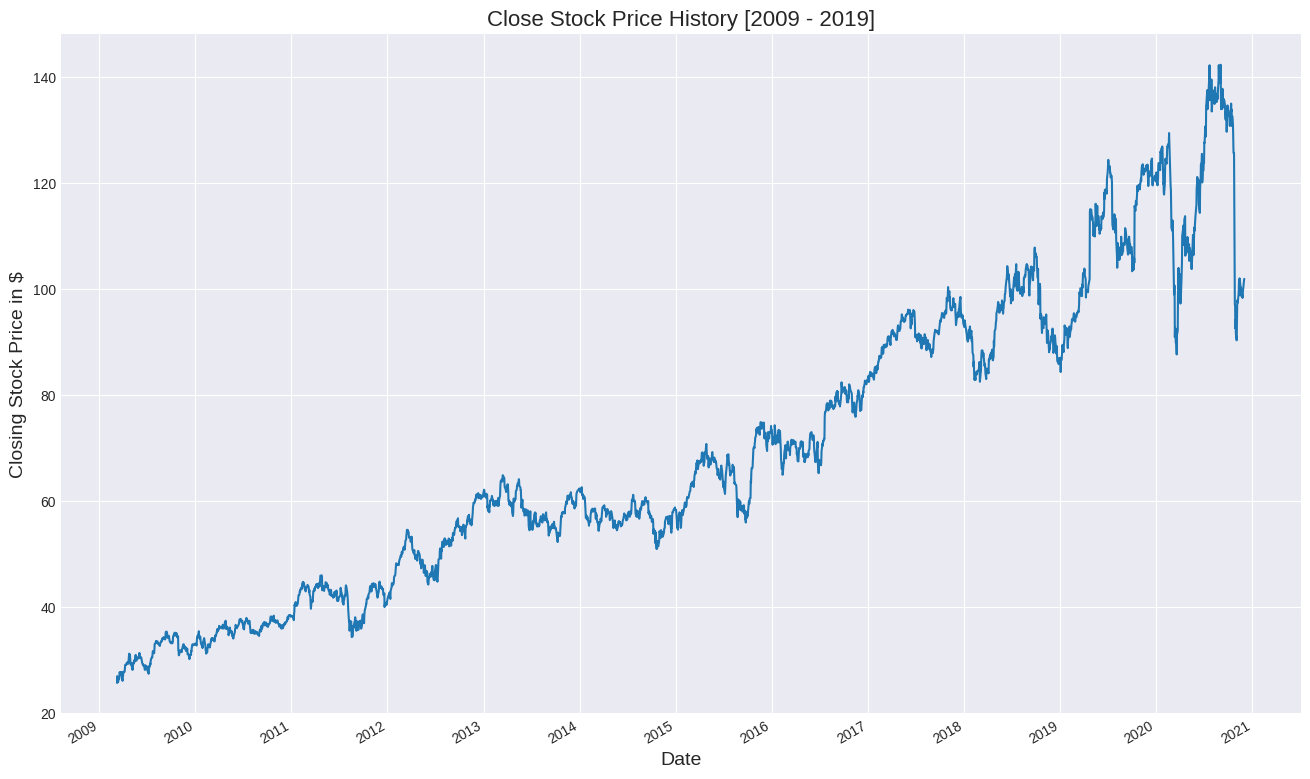

In [18]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Linear Regression
 
This data contains only one **independent variable ($X$) ** which represents the *date* and the **dependent variable ($Y$) ** we are trying to predict is the *Stock Price*. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, use a **Simple Linear Regression**.

The best fit line can be described with  
$$
Y = \beta_0 + \beta_1 X
$$

where  
* $Y$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept
* $\beta_1$ is the slope
* $X$ is the value of the independent variable

The goal is to find such coefficients $\beta_0$ and $\beta_1$ that the **Sum of Squared Errors**, which represents the difference between each point in the dataset with its corresponding predicted value outputted by the model, is minimal.


### Training a Linear Regression Model
### Train Test Split

In [19]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model


In [21]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [22]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation


In [23]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.03115561504042455
Intercept:  22.534495995794295


<ipython-input-23-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

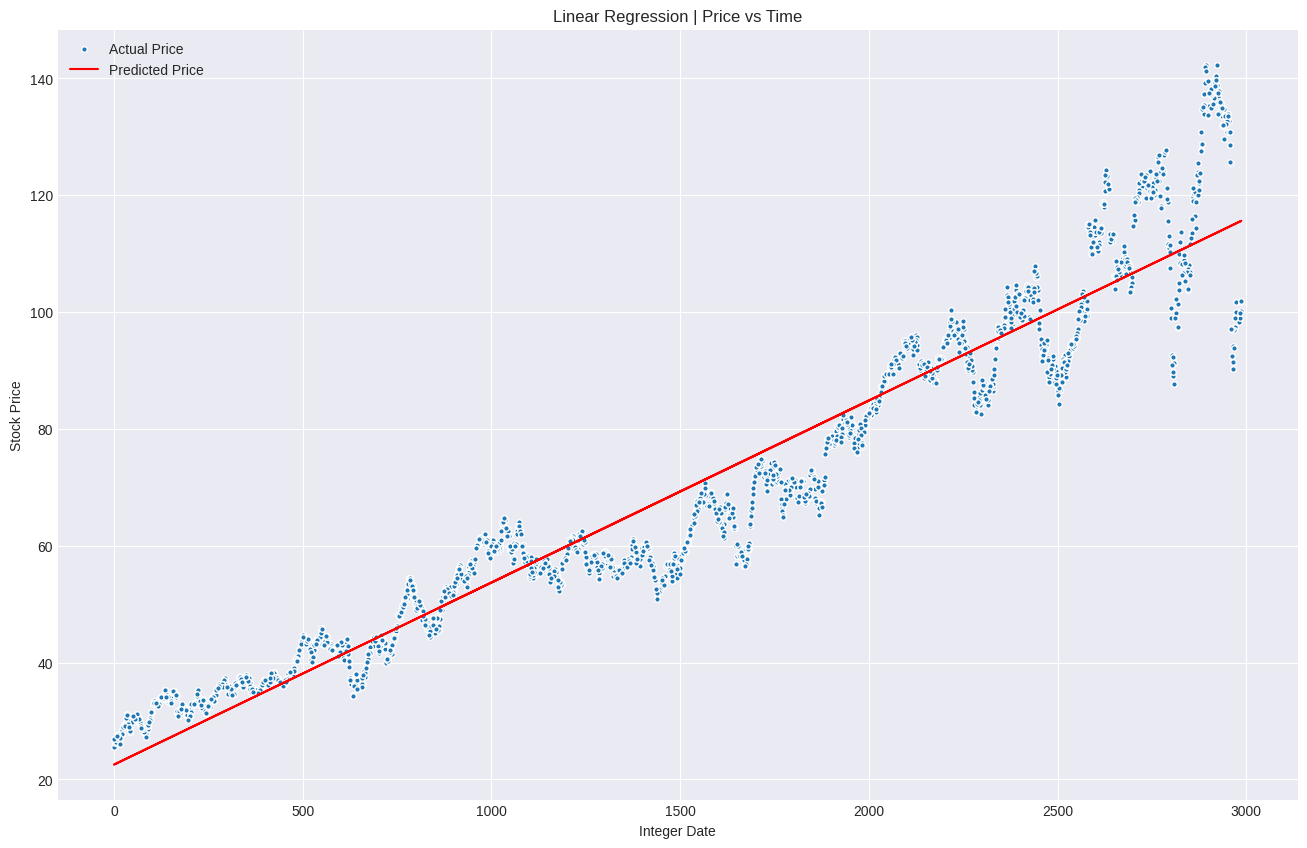

In [24]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model


In [25]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

# Generate array with predicted values
y_pred = model.predict(X_test)

## Regression Evaluation


Compare the predicted values with the actual value on random sample from data set.


In [26]:
# Get number of rows in data set for random sample
df.shape

# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

df_sample.head()

,Date,Close
12,2009-03-25,27.49
67,2009-06-10,30.02
111,2009-08-11,33.07
325,2010-06-09,36.24
338,2010-06-28,37.35


Observe larger variations between predicted and actual values in the random sample.  
Also observe the model performance over the whole test data set. 

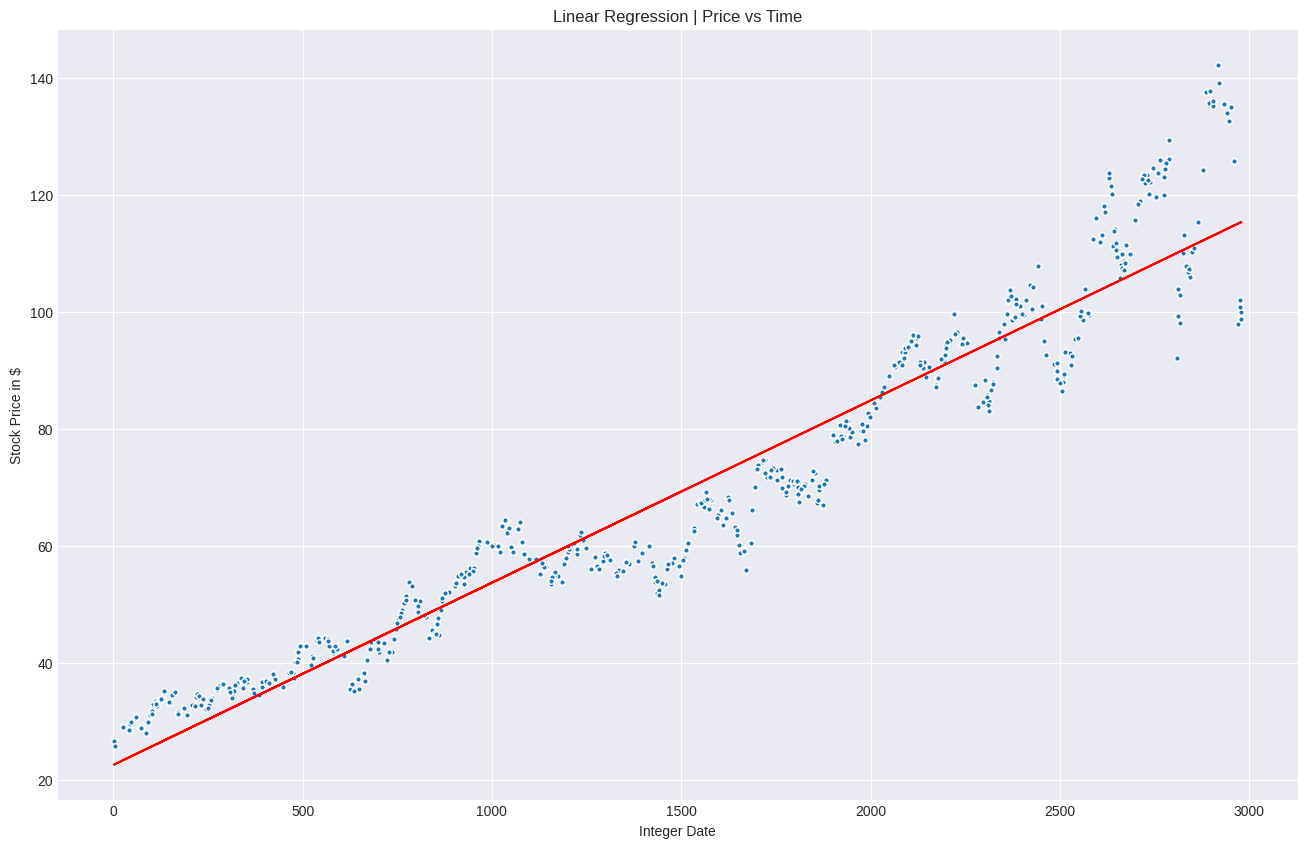

In [28]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

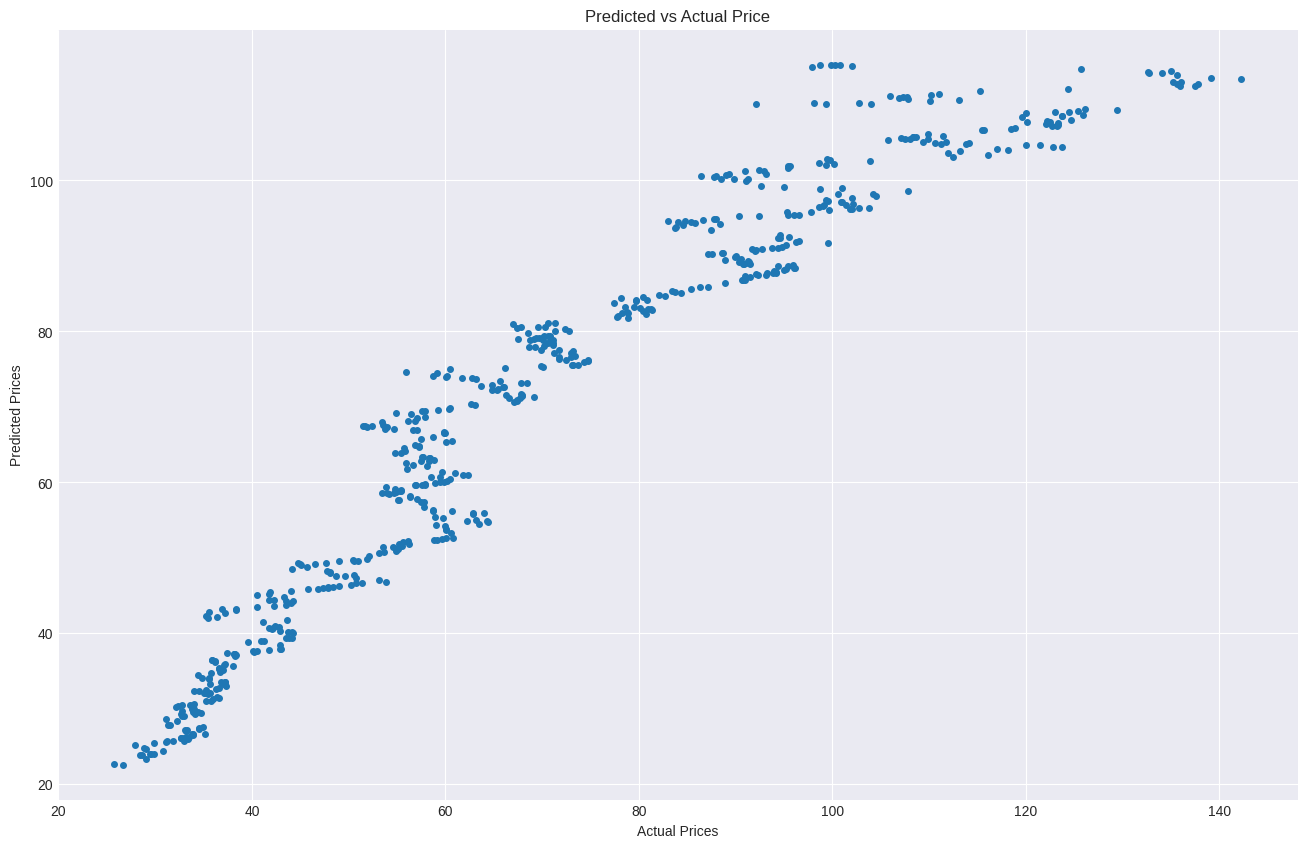

In [29]:

# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good.  
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.  
Also in the area around 85 - 110 the data point is spread out quite heavily and the predictions don't cover the values above 100.


#### Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right. 

In [30]:
# Import norm package to plot normal distribution
from scipy.stats import norm

In [31]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

<ipython-input-32-398f0e9463dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')


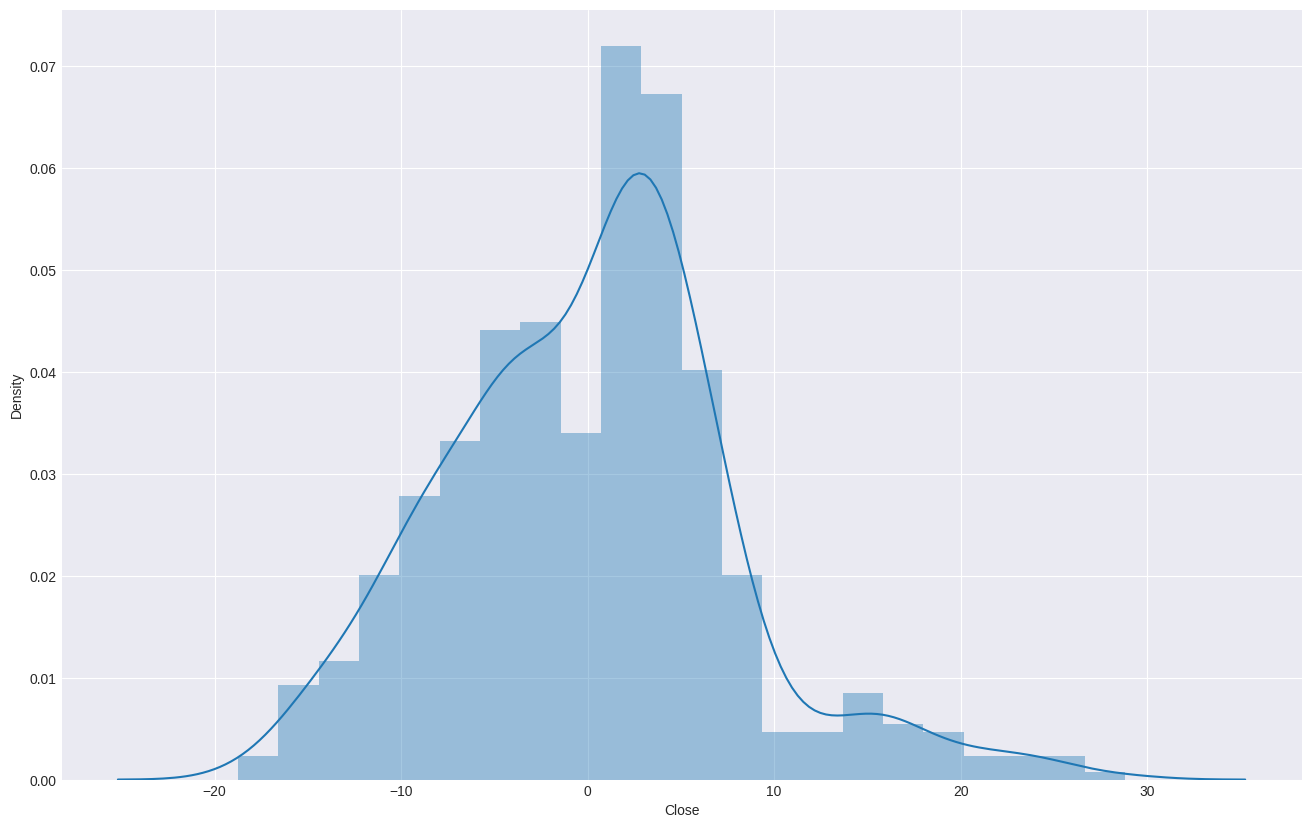

In [32]:
ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

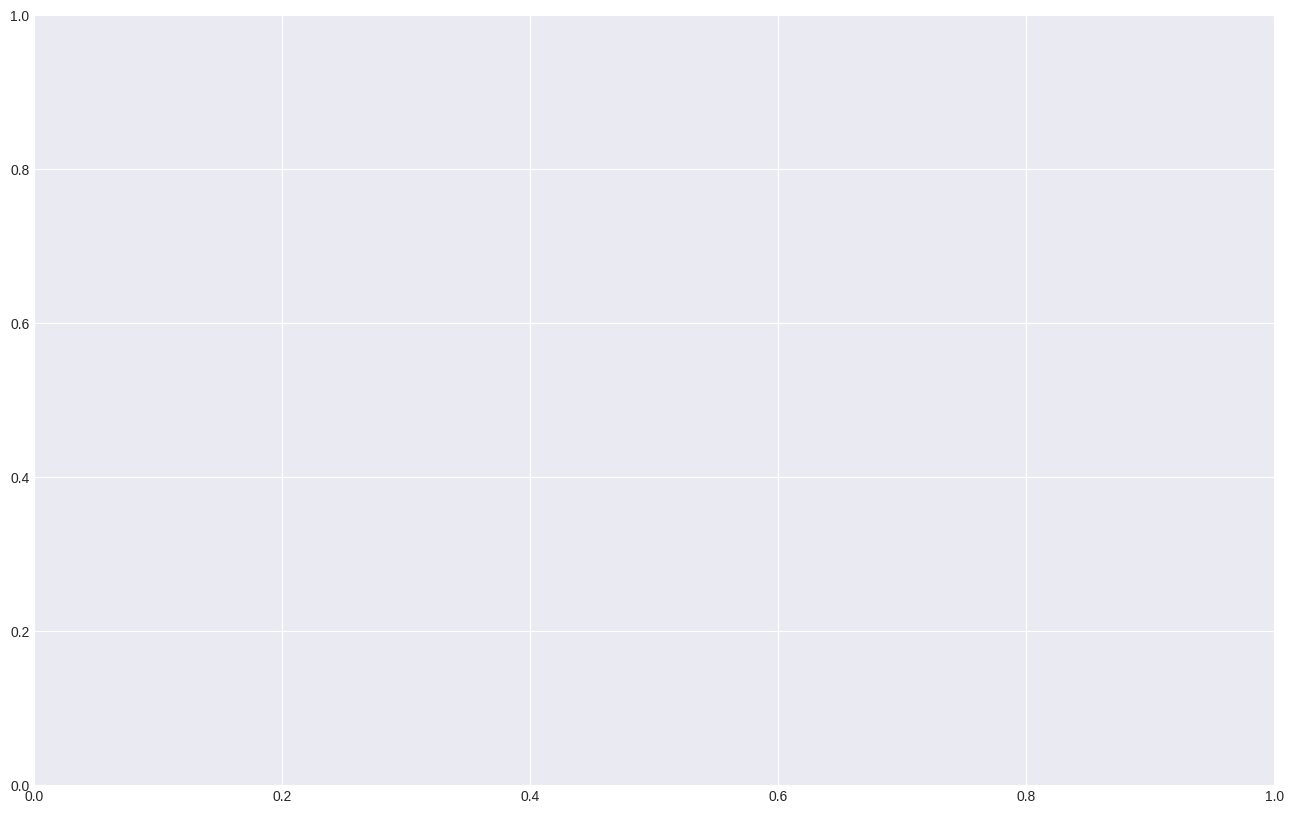

In [33]:
# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [34]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

df.head()

,Date,Close,Prediction
0,2009-03-09,25.59,22.534496
1,2009-03-10,26.87,22.565652
2,2009-03-11,26.64,22.596807
3,2009-03-12,26.18,22.627963
4,2009-03-13,25.73,22.659118


### Error Evaluation Metrics

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

Minimize all of these are **cost functions**.


In [35]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [36]:
# Statistical summary of test data
df['Close'].describe()

count    2988.000000
mean       69.079700
std        27.983287
min        25.590000
25%        44.970000
50%        61.000000
75%        91.422500
max       142.340000
Name: Close, dtype: float64

In [37]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.9988728497197545
Mean Squared Error: 59.4387496489173
Root Mean Squared Error: 7.709653017413774


* The MAE is 3% (of minimum) and 6% (of maximum) of the Closing Price.
* The other two errors are larger, because the errors are squared and have therefore a greater influence on the result.

### Accuracy Evaluation Metrics

To see how accurate our model is, calculate the **Coefficient of determination**, which describes the ratio between the total error and the error, that is explained by designed model. It's value is between 0 and 1, with 1 meaning 100% of the error is acoounted for by the model. 

**Coefficient of determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with  

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$

In [38]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.92437213373562


In [39]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9243786237057194

The value of $R^2$ shows that are model accounts for nearly 94% of the differences between the actual stock prices and the predicted prices.
